<a href="https://colab.research.google.com/github/Naveenkondisetty/ML-Lab-/blob/main/Lab15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  ta

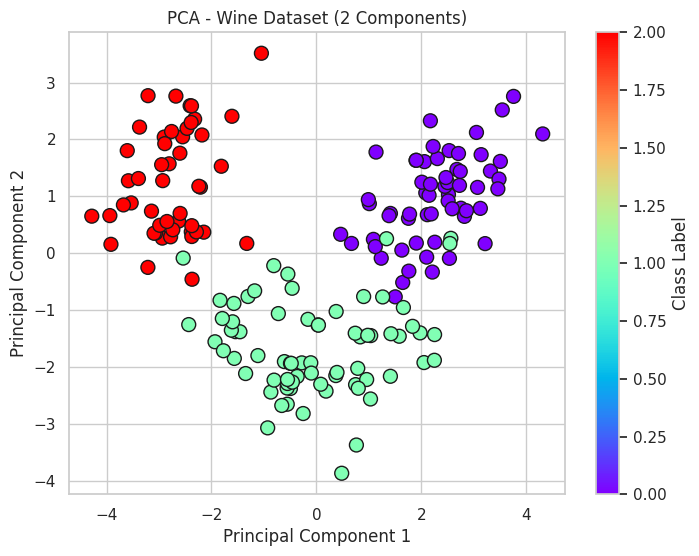

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_wine

# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Target (cultivars/classes)

# Convert the dataset into a DataFrame for better readability
df = pd.DataFrame(data=wine.data, columns=wine.feature_names)
df['target'] = y

print("Dataset Overview:")
print(df.head())

# Standardize the dataset (mean=0, variance=1) - Important step for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implement PCA (reduce to 2 components for visualization)
pca = sklearnPCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance to see how much information (variance) is retained
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance (Percentage of Variance Explained by each Component):")
print(explained_variance)

# Plot the PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='rainbow', edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Wine Dataset (2 Components)')
plt.colorbar(scatter, label='Class Label')
plt.grid(True)
plt.show()



Dataset shape: (1797, 64)
Number of samples: 1797
Number of features: 64

Explained Variance (Percentage of Variance Explained by each Component):
[0.12033916 0.09561054]


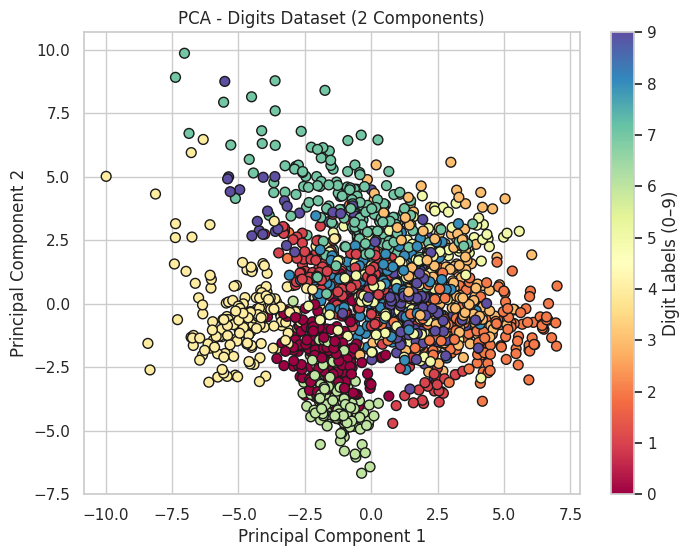

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler

# Load the Digits dataset
digits = load_digits()
X = digits.data  # Features (64 dimensions)
y = digits.target  # Target (digit labels 0–9)

# Dataset Overview
print("Dataset shape:", X.shape)
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions to 2 (for visualization)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance
explained_variance = pca.explained_variance_ratio_
print("\nExplained Variance (Percentage of Variance Explained by each Component):")
print(explained_variance)

# Plot the PCA result
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='Spectral', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Digits Dataset (2 Components)')
plt.colorbar(scatter, label='Digit Labels (0–9)')
plt.grid(True)
plt.show()